In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('balanced_dataset.csv')
df.drop('id', inplace=True, axis=1)

In [3]:
y = df.pop('stroke')
X = df

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
n_estimators = [50,70,90,100,110,130,150,200,300]
max_features = [3,4,5,6,7,8]

param_grid = {'n_estimators':n_estimators, 'max_features':max_features}

In [6]:
rfc = RandomForestClassifier(verbose=1)
rfc_grid = GridSearchCV(rfc, param_grid=param_grid)
rfc_grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(estimator=RandomForestClassifier(verbose=1),
             param_grid={'max_features': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 70, 90, 100, 110, 130, 150, 200,
                                          300]})

In [7]:
rfc_grid.best_params_

{'max_features': 3, 'n_estimators': 90}

In [8]:
rfc = RandomForestClassifier(n_estimators=130, max_features=3)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [9]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       975
           1       0.99      1.00      0.99       970

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945

[[962  13]
 [  0 970]]


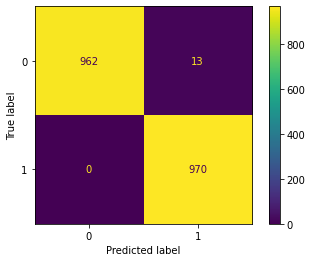

In [10]:
conf_mat = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.savefig('Final_Confusion_matrix.jpg')